In [34]:
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt

In [35]:

# Load your dataset
df = pd.read_csv("final_comb_data.csv")
aggregated_data = df.groupby('Country')['Literarcy rate'].mean().reset_index()
world_map = gpd.read_file('world_map.geojson')


In [37]:
df["Year"].max()

2016

In [30]:
merged_data = world_map.merge(aggregated_data, how='left', left_on='name', right_on='Country')

# Convert merged data to GeoJSON-like format
merged_geojson = json.loads(merged_data.to_json())

# Write merged GeoJSON data to a file
with open('merged_world_map.geojson', 'w') as f:
    json.dump(merged_geojson, f)

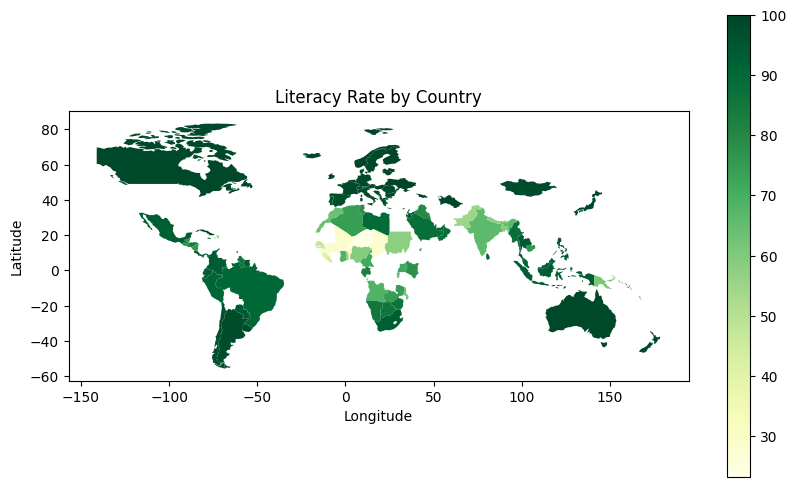

In [33]:
with open('merged_world_map.geojson', 'r') as f:
    merged_geojson = json.load(f)

# Create a GeoDataFrame from the GeoJSON data
gdf = gpd.GeoDataFrame.from_features(merged_geojson['features'])

# Plot the choropleth map
gdf.plot(column='Literarcy rate', cmap='YlGn', legend=True, figsize=(10, 6))
plt.title('Literacy Rate by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()